In [7]:
#import basic libraries for use in project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import the csv to use in pandas
dfi = pd.read_csv('kobedata.csv')


#some of the shots has the shot_made_flag missing, so this creates a new df with only made or missed shots
df = dfi[((dfi['shot_made_flag'] == 0) | (dfi['shot_made_flag'] == 1))]

#separating out all of the different types of shots taken for use in the for loop later
shot_area = set(list(df['shot_zone_area']))
print(shot_area)
shot_dist = set(list(df['shot_zone_basic']))
print(shot_dist)
shot_type = set(list(df['combined_shot_type']))
print(shot_type)

#initializing empty lists to use in the for loop
total_shots_made = []
total_shots_missed = []
names = []

#for loop that appends the name, total shots made, 
# and total shots missed into their respective lists for all 252 combinations
for x in shot_area:
    for i in shot_dist:
        for j in shot_type:
            made_counter = 0
            missed_counter = 0
            df_filt = df[((df['shot_zone_area'] == x) & (df['shot_zone_basic'] == i) 
                         & (df['combined_shot_type'] == j))]
            #print(df_filt)
            for n in df_filt['shot_made_flag']:
                if n == 1:
                    made_counter += 1
                elif n == 0:
                    missed_counter += 1
            total_shots_made.append(made_counter)
            total_shots_missed.append(missed_counter)
            name_list = [x+i+j]
            names.append(name_list)

#used print( repr(df_name)) to discover that the print function wasn't showing the entire string
#Here make a new list to append the stripped down versions of the name bc of hidden string values
names_new = []
for i in names:
    i = str(i)
    i = ''.join(filter(str.isalpha, i))
    names_new.append(i)
    
#here create a new column in the dataframe for percentages based on each type of shot    
#this was a lot hader that I thought it would be to get everything in order
percentage = []
for m in range(len(dfi)):
    df_name = dfi['shot_zone_area'][m] + dfi['shot_zone_basic'][m] + dfi['combined_shot_type'][m]
    df_name = ''.join(filter(str.isalpha, df_name))
    for i in names_new:
        if i == df_name:
            v = names_new.index(i)
            try:
                percentage.append((total_shots_made[v])/(total_shots_made[v]+total_shots_missed[v]))
            except:
                percentage.append('null')
dfi['Percentage'] = percentage
#filtered dataframe with only completed shots for testing
dfx = dfi[((dfi['shot_made_flag'] == 1))]
print('complete')



{'Right Side Center(RC)', 'Left Side(L)', 'Center(C)', 'Back Court(BC)', 'Left Side Center(LC)', 'Right Side(R)'}
{'Right Corner 3', 'In The Paint (Non-RA)', 'Mid-Range', 'Backcourt', 'Above the Break 3', 'Restricted Area', 'Left Corner 3'}
{'Layup', 'Bank Shot', 'Tip Shot', 'Hook Shot', 'Dunk', 'Jump Shot'}
complete


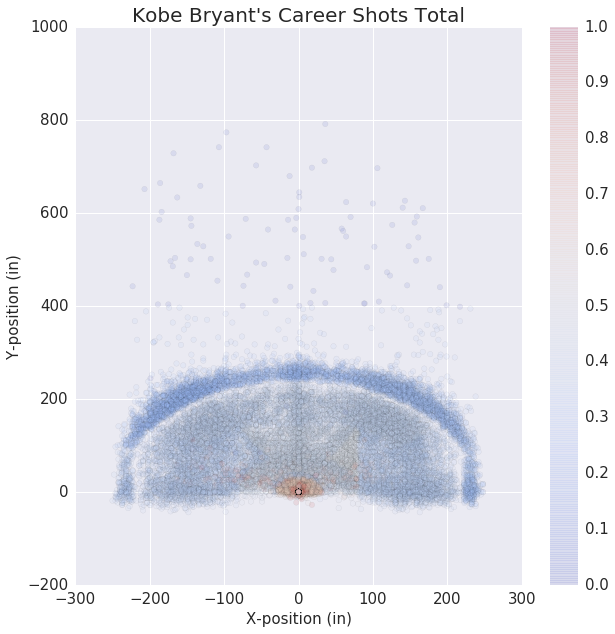

In [8]:
#the magic words to get graphs to print
%matplotlib inline

#make the graph use colors based off of the percentages of the shots
colors = plt.cm.coolwarm(dfi['Percentage'])
jet=plt.get_cmap('coolwarm')

#plot each shot on a scatterplot and color each dot by percentage and make opacity low to see density of shot locations
plt.figure(figsize=(10,10))
plt.scatter(dfi['loc_x'], dfi['loc_y'], s=30,alpha =0.1, c=dfi['Percentage'], cmap=jet, vmin=0, vmax=1)
plt.title('Kobe Bryant\'s Career Shots Total', fontsize = 20)
plt.xlabel('X-position (in)', fontsize = 15)
plt.ylabel('Y-position (in)', fontsize = 15)
plt.colorbar()
plt.show()

{'Bank Shot': 120, 'Hook Shot': 127, 'Layup': 4532, 'Dunk': 1056, 'Jump Shot': 19710, 'Tip Shot': 152}


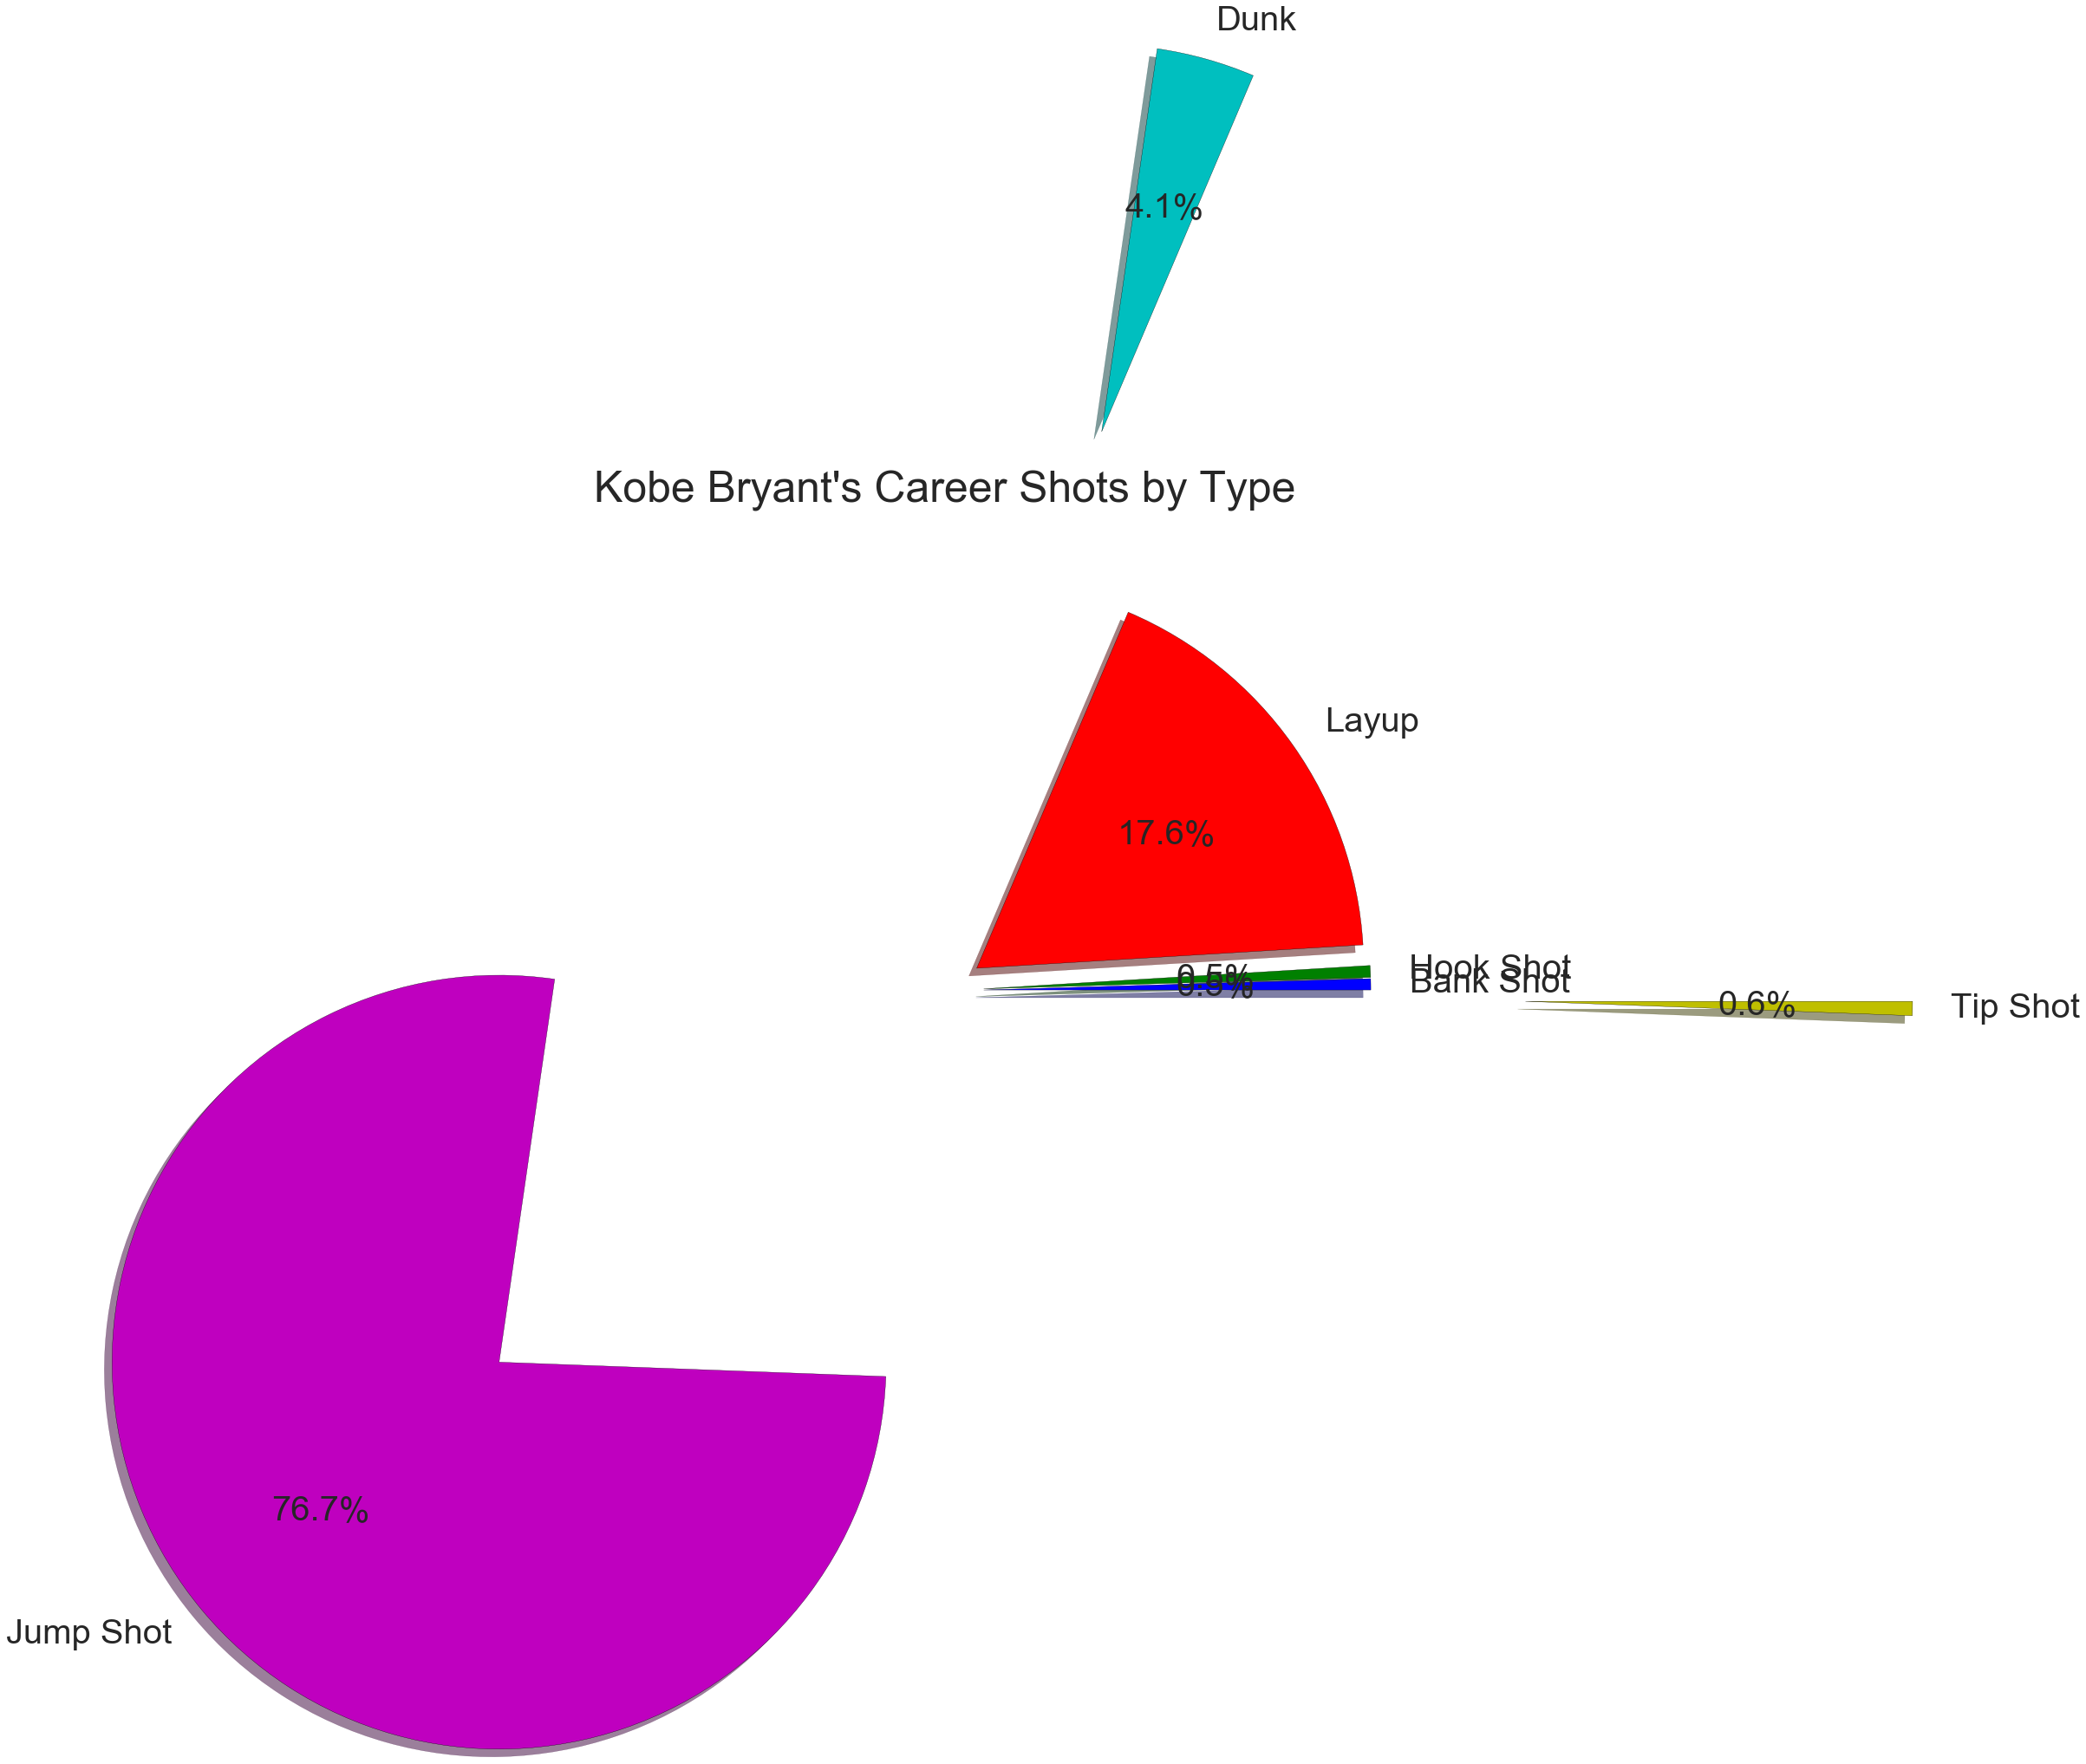

In [16]:
%matplotlib inline

#Here I create a pie chart based on the different types of shots Bryant took
#note, since its a dictionary, it randomizes each time so the exploded graph needs adjustments
type_counter = {}
#figure out how often he attempted each type of shot
for x in df['combined_shot_type']:
    if x in type_counter:
        type_counter[x] += 1
    else:
        type_counter[x] = 1
        
print(type_counter)
#set up variables to use in the pie chart
values = type_counter.values()
keys = type_counter.keys()
total = 0
for x in values:
    total = total + x
names = []
for x in keys:
    names.append(str(x))

counts = []
for x in values:
    counts.append(int(x))
    
percentages = []
for x in counts:
    percentages.append(x/total)
    
plt.rcParams['font.size'] = 40.0
plt.figure(figsize=(20,20))
patches, texts, autotexts = plt.pie(counts, labels=names, 
                                    shadow=True,explode = (0.1,0.1,0.1,1.5,1.5,1.5), autopct='%1.1f%%')
plt.title('Kobe Bryant\'s Career Shots by Type', fontsize = 50)
for x in range(0,6):
    texts[x].set_fontsize(40)
plt.show()

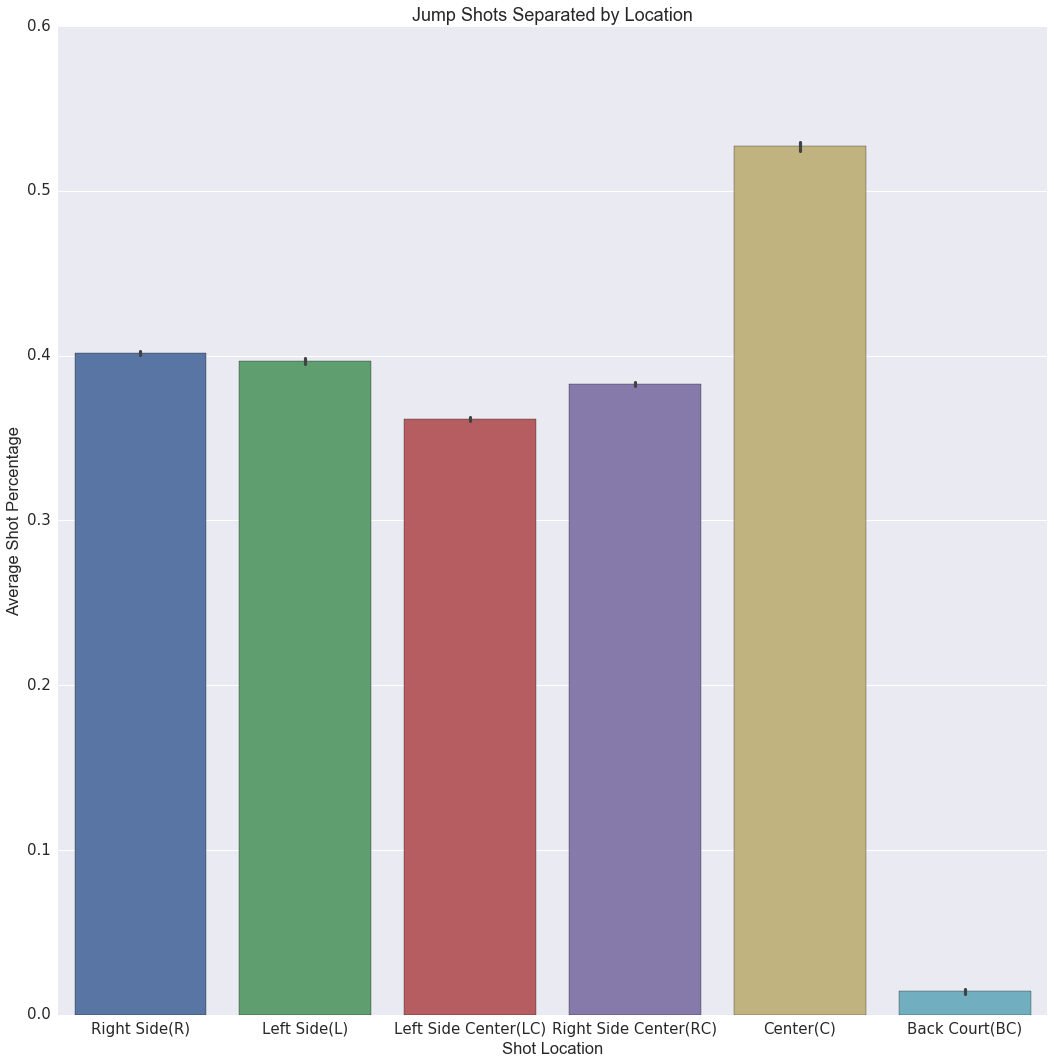

In [22]:
#use seaborn for facotplots!
import seaborn as sns
sns.set(font_scale = 1.5)


#create bargraphs for jumpshots percentages based on the position on the court
dfj = dfi[((dfi['combined_shot_type'] == 'Jump Shot'))]
g = sns.factorplot(x='shot_zone_area', y = 'Percentage', 
                   data = dfi,estimator = np.mean, size = 15, kind = 'bar') 
                   #np.sum, np.mean, np.median, np.count_nonzero, np.stdetc
g.set(xlabel='Shot Location', ylabel='Average Shot Percentage', title = 'Jump Shots Separated by Location')

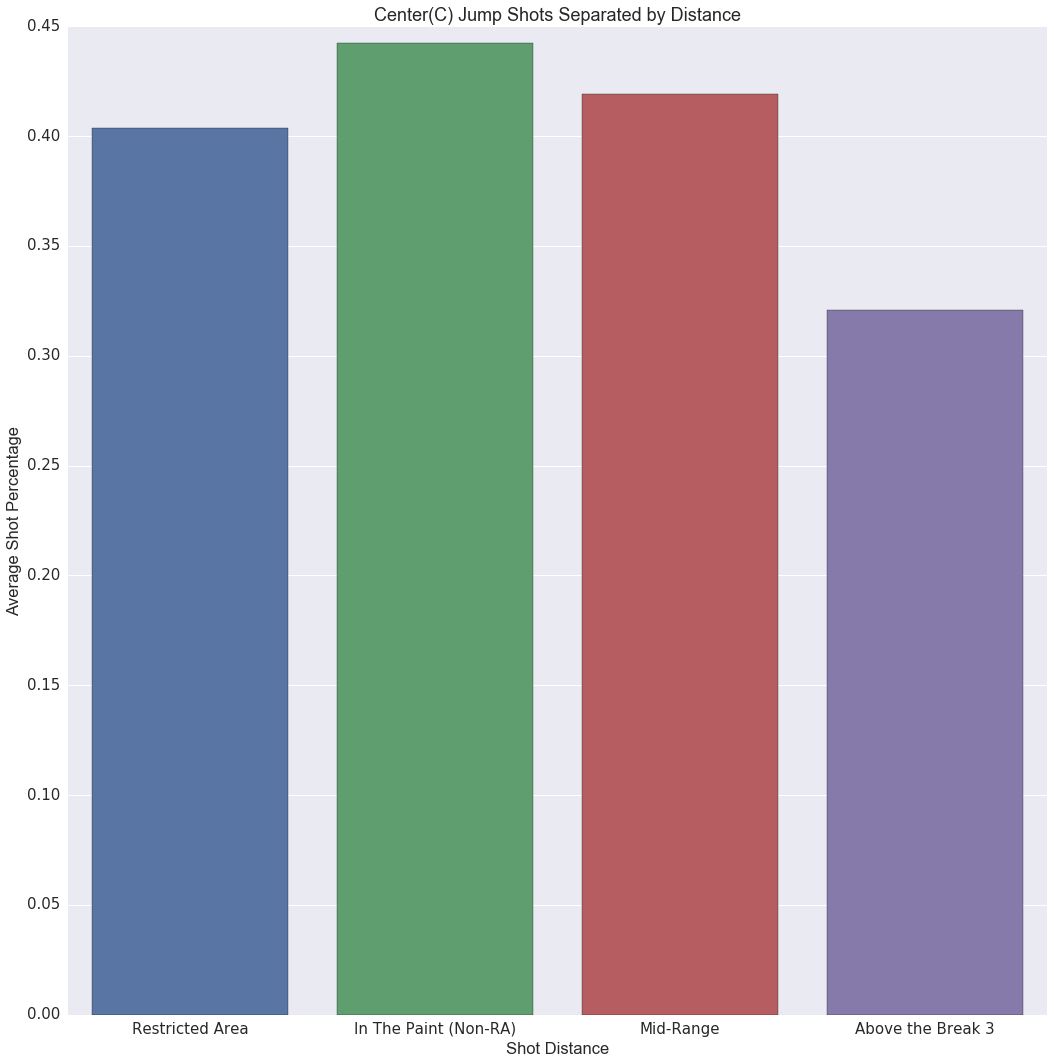

In [23]:
df_dist = dfj[dfj['shot_zone_area'] == 'Center(C)']
g = sns.factorplot(x='shot_zone_basic', y = 'Percentage', 
                   data = df_dist,estimator = np.average, size = 15, kind = 'bar') 
                   #np.sum, np.mean, np.median, np.count_nonzero, np.stdetc
g.set(xlabel='Shot Distance', ylabel='Average Shot Percentage', title = 'Center(C) Jump Shots Separated by Distance')